# GAN to Augument Features

### Import Libraries 

In [1]:
import os
import sys
import time
import pandas as pd
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose,LeakyReLU,BatchNormalization,  MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [3]:
# Add the path to the functions directory
sys.path.append('../functions')  # Add the path to the functions directory

## Load Dataset 

### Load Tiles

In [4]:
# import user defined function for loading tiles from datasets/tiles using functions/load_dataset.py
from load_dataset import load_images_from_directory
# specify path and call function 
directory = "../dataset/tiles"
tiles = load_images_from_directory(directory)

### Visualize Tile after loading

Number of images loaded: 99
Shape of sample image: (512, 512, 3)


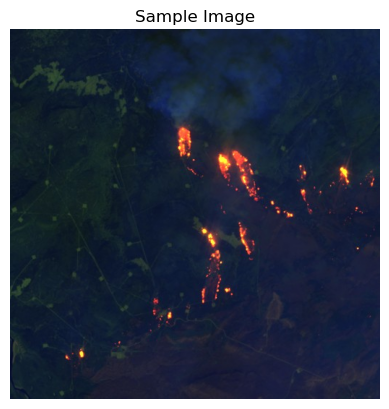

In [5]:
# confirm if tiles [] holds images, print length and plot 

# Confirm if tiles[] holds images
if len(tiles) > 0:
    # Display the number of images loaded
    print(f"Number of images loaded: {len(tiles)}")

    # Display a sample image
    sample_tile = tiles[1]

    print(f"Shape of sample image: {sample_tile.shape}")

    # Plot the sample image
    plt.imshow(cv2.cvtColor(sample_tile, cv2.COLOR_BGR2RGB))
    plt.title("Sample Image")
    plt.axis('off')
    plt.show()
else:
    print("No images loaded from the directory.")


### Normalize Tiles

In [6]:
# import user defined function for normalizing tiles from functions/tile_normalize
from tile_normalize import normalize_tiles
# call function to normalize
normalized_tiles = normalize_tiles(tiles)

### Plot a Normalized Tile

Number of Tiles loaded: 99
Shape of Tile : (512, 512, 3)


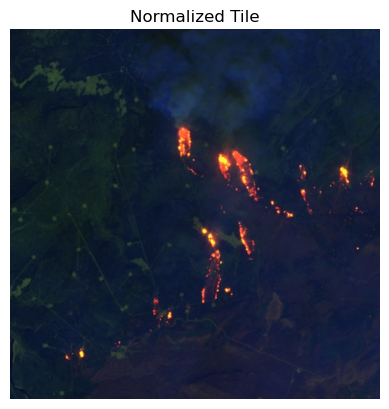

In [9]:
# confirm if tiles [] holds images, print length and plot 

# Confirm if tiles[] holds images
if len(normalized_tiles) > 0:
    # Display the number of images loaded
    print(f"Number of Tiles loaded: {len(normalized_tiles)}")

    # Display a sample image
    sample_tile = normalized_tiles[1]

    print(f"Shape of Tile : {sample_tile.shape}")

    uint8_image = (sample_tile * 255).astype(np.uint8)
    # Plot the uint8 image
    plt.imshow(cv2.cvtColor(uint8_image, cv2.COLOR_BGR2RGB))
    plt.title("Normalized Tile")
    plt.axis('off')
    plt.show()
else:
    print("No images loaded from the directory.")


###  Min Max check for tiles

In [10]:
### minium and max values for tiles
print("Normalized tiles Min:", normalized_tiles[0].min())
print("Normalized tiles Max:", normalized_tiles[0].max())
print("Normalized tiles Data type:", normalized_tiles[0].dtype)

Normalized tiles Min: 0.0
Normalized tiles Max: 1.0
Normalized tiles Data type: float64


### load Masks / Labels

In [11]:
from load_binary_masks import load_binary_masks
# specify path and call function 
mask_dir = "../dataset/masks"
masks = load_binary_masks(mask_dir)

In [12]:
print(f"masks has type {masks[0].dtype}, image is {type(masks[0])}, dimensions are {masks[0].shape}")

masks has type uint8, image is <class 'numpy.ndarray'>, dimensions are (512, 512, 1)


### Plot a Mask

Number of masks loaded: 99
Shape of sample mask: (512, 512, 1)


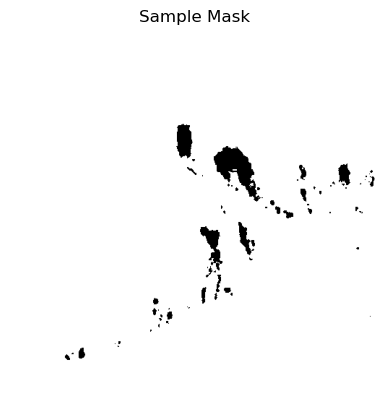

In [14]:
# Confirm if masks[] holds masks
if len(masks) > 0:
    # Display the number of masks loaded
    print(f"Number of masks loaded: {len(masks)}")

    # Display a sample image
    sample_mask = masks[1]

    print(f"Shape of sample mask: {sample_mask.shape}")

    # Plot the sample image as grayscale
    plt.imshow(sample_mask, cmap='binary')
    plt.title("Sample Mask")
    plt.axis('off')
    plt.show()
else:
    print("No images loaded from the directory.")

### Min Mask Check for Masks

In [15]:
print("Masks  Min:", masks[0].min())
print("Masks  Max:", masks[0].max())
print("Masks Data type", masks[0].dtype)

Masks  Min: 0
Masks  Max: 1
Masks Data type uint8


### Normalize Masks

In [16]:
# call function to normalize masks for consistency 
normalized_masks = normalize_tiles(masks)

In [17]:
#recheck Min Max 
# check the normalized masks
print("Normalized Masks  Min:", normalized_masks[0].min())
print("Normalized Masks  Max:", normalized_masks[0].max())
print("Normalized Masks Data type", normalized_masks[0].dtype)

Normalized Masks  Min: 0.0
Normalized Masks  Max: 1.0
Normalized Masks Data type float64


### Plot a Normalized Mask

Number of Normalized masks loaded: 99
Shape of sample Normalized mask: (512, 512, 1)


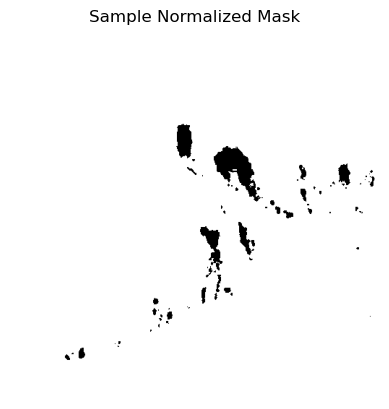

In [19]:
# Confirm if normalized_masks[] holds masks
if len(normalized_masks) > 0:
    # Display the number of masks loaded
    print(f"Number of Normalized masks loaded: {len(normalized_masks)}")

    # Display a sample image
    sample_mask = normalized_masks[1]

    print(f"Shape of sample Normalized mask: {sample_mask.shape}")

    # Plot the sample image as grayscale
    plt.imshow(sample_mask, cmap='binary')
    plt.title("Sample Normalized Mask")
    plt.axis('off')
    plt.show()
else:
    print("No images loaded from the directory.")

### Plot of Tiles, Mask, Normalized_tiles, and Normalized_masks

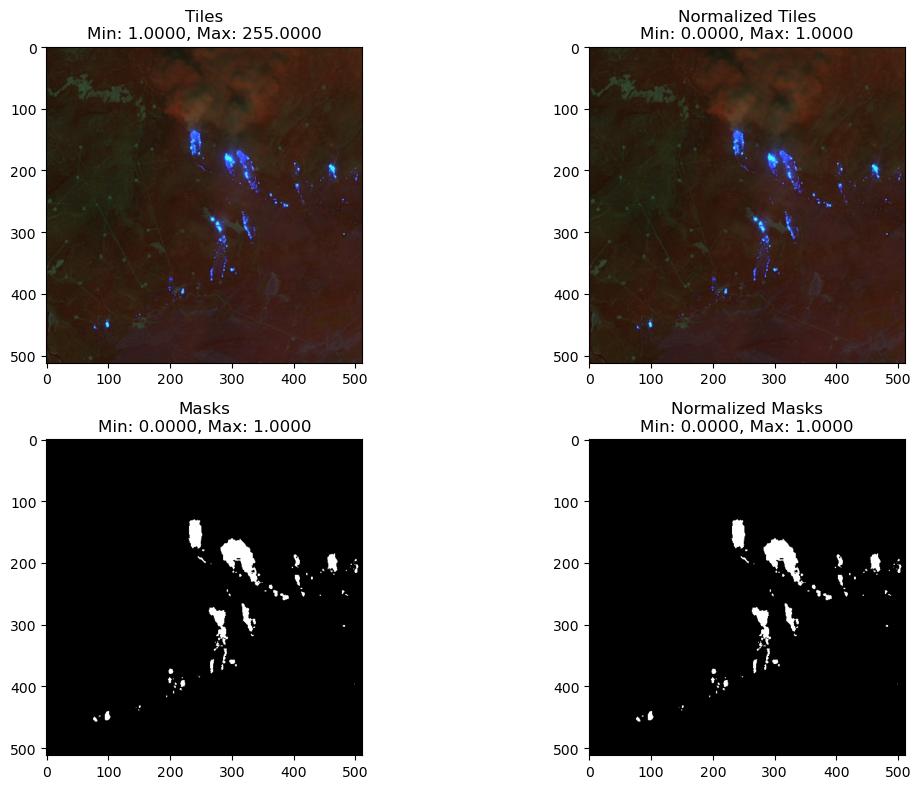

In [20]:
# Assuming you have your data loaded in variables:
# tiles, normalized_tiles, masks, normalized_masks

# Sample index to display 
index = 1 

# Create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot the 'tiles' image
axes[0, 0].imshow(tiles[index])  # Adjust cmap if not grayscale
axes[0, 0].set_title("Tiles\nMin: {:.4f}, Max: {:.4f}".format(tiles[index].min(), tiles[index].max()))

# Plot the 'normalized_tiles' image
axes[0, 1].imshow(normalized_tiles[index])
axes[0, 1].set_title("Normalized Tiles\nMin: {:.4f}, Max: {:.4f}".format(normalized_tiles[index].min(), normalized_tiles[index].max()))

# Plot the 'masks' image
axes[1, 0].imshow(masks[index], cmap='gray')
axes[1, 0].set_title("Masks\nMin: {:.4f}, Max: {:.4f}".format(masks[index].min(), masks[index].max()))

# Plot the 'normalized_masks' image
axes[1, 1].imshow(normalized_masks[index], cmap='gray')
axes[1, 1].set_title("Normalized Masks\nMin: {:.4f}, Max: {:.4f}".format(normalized_masks[index].min(), normalized_masks[index].max()))

#  Adjust spacing for aesthetics
fig.tight_layout()
plt.show()


### Plot Normalized Tiles vs Normalized Masks

In [21]:
# import user defined function to plot tiles and masks from functions/iplot_masks_tiles.py 
from plot_masks_tiles import plot_masks_vs_tiles

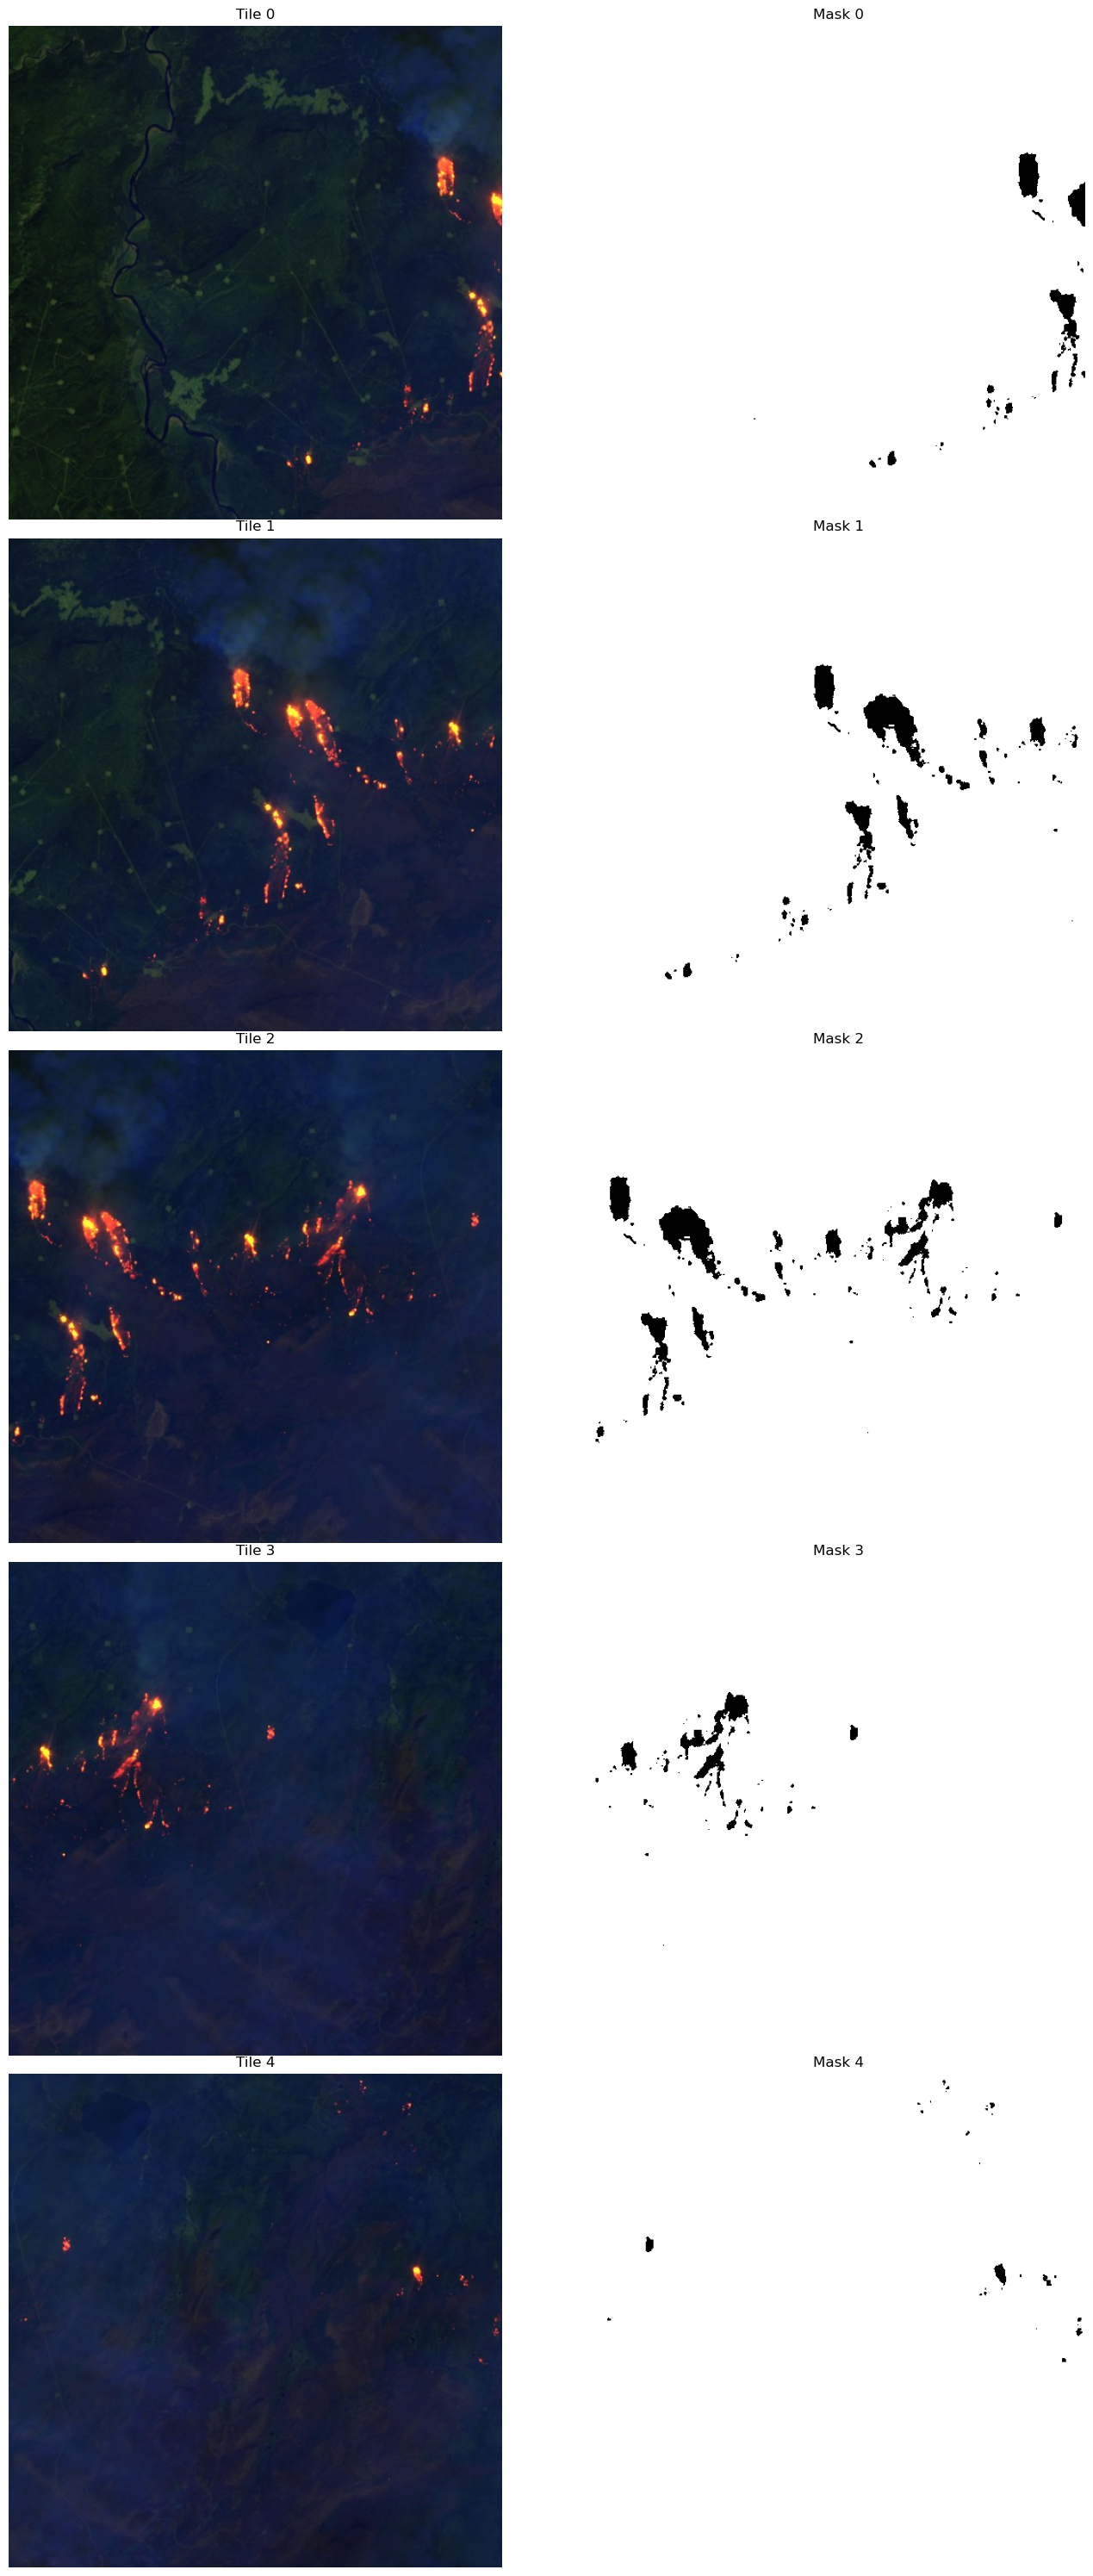

In [22]:
# Define the number of tiles to plot
num_tiles_to_plot = 5

# Plot the tiles and masks
fig, axs = plt.subplots(num_tiles_to_plot, 2, figsize=(15, 30))  # Adjust the figure size here

for i in range(num_tiles_to_plot):
    # Plot the tile (colored)
    tile_index = i  # Adjust this index based on how your tiles are loaded
    mask_index = i  # Adjust this index based on how your masks are loaded
    
    #temporarily convert normalized_tiles to unit8 to plot
    uint8_image = (normalized_tiles[tile_index] * 255).astype(np.uint8)
    # Plot the uint8 image
    axs[i, 0].imshow(cv2.cvtColor(uint8_image, cv2.COLOR_BGR2RGB))
    axs[i, 0].set_title(f'Tile {tile_index}')
    axs[i, 0].axis('off')
    
    # Plot the mask (black and white)
    axs[i, 1].imshow(normalized_masks[mask_index], cmap='binary')
    axs[i, 1].set_title(f'Mask {mask_index}')
    axs[i, 1].axis('off')

plt.tight_layout(h_pad=0.1)  # Adjust the spacing between subplots here
plt.show()


### Type check for Tiles and Masks

In [23]:
print(f'type of Tiles {type(normalized_tiles)}')
print(f'Tiles dtype {normalized_tiles[0].dtype} ')
print(f'type of Mask {type(normalized_masks)}')
print(f'Mask dtype {normalized_masks[0].dtype} ')

type of Tiles <class 'list'>
Tiles dtype float64 
type of Mask <class 'list'>
Mask dtype float64 


### Convert Tiles and Masks to NP Arrays

In [24]:
## convert normalized_tiles to np arrays
np_normalized_tiles = np.asarray(normalized_tiles)

In [25]:
## convert normalized_masks to np arrays
np_normalized_masks = np.asarray(normalized_masks)

In [26]:
## Check for consistency before augumentation
print(f'type of Tiles {type(np_normalized_tiles)}')
print(f'Tiles dtype {np_normalized_tiles.dtype} ')
print(f"Shape of normalized tiles: {np_normalized_tiles.shape}")
print("----------------------------------------------------------------")
print(f'type of Mask {type(np_normalized_masks)}')
print(f'Mask dtype {np_normalized_masks.dtype} ')
print(f"Shape of normalized masks: {np_normalized_masks.shape}")

type of Tiles <class 'numpy.ndarray'>
Tiles dtype float64 
Shape of normalized tiles: (99, 512, 512, 3)
----------------------------------------------------------------
type of Mask <class 'numpy.ndarray'>
Mask dtype float64 
Shape of normalized masks: (99, 512, 512, 1)


# Start Data Augumentation

### Import User defined Functions

In [28]:
# Add the path to the functions directory for GAN
sys.path.append('../functions/gan')  # Add the path to the Gan functions sub directory

In [29]:
#import functions

In [30]:
#import generator 
from generator_discriminator import build_generator, build_discriminator

In [31]:
#import discriminator  and generator loss
from gen_disc_loss import generator_loss, discriminator_loss 

In [32]:
#import training step
from train_step import train_step

### Train Conditional GAN

In [ ]:
# Define hyperparameters
latent_dim = 100
num_classes = 1  # Adjusted for binary classification
EPOCHS = 100
BATCH_SIZE = 32  # Adjust according to your hardware capabilities

# Assuming your tiles and masks are stored in X_train and y_train respectively
# The shape of X_train should be (num_samples, 512, 512, 3)
# The shape of y_train should be (num_samples, 512, 512, 1)

# Build and compile the discriminator
discriminator = build_discriminator(input_shape=(512, 512, 3), num_classes=num_classes)
discriminator.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy')

# Build the generator
generator = build_generator(latent_dim, num_classes)

# The generator takes noise and the target label as input
noise = Input(shape=(latent_dim,))
label = Input(shape=(num_classes,))
img = generator([noise, label])

# For the combined model we will only train the generator
discriminator.trainable = False

# The discriminator takes generated images and the target label as input
validity = discriminator([img, label])

# The combined model (stacked generator and discriminator)
combined = Model([noise, label], validity)
combined.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy')

# Train the conditional GAN
for epoch in range(EPOCHS):
    for batch_idx in range(len(X_train) // BATCH_SIZE):
        # Select a random batch of images
        idx = np.random.randint(0, len(X_train), BATCH_SIZE)
        real_images, labels = X_train[idx], y_train[idx]

        # Sample noise
        noise = np.random.normal(0, 1, (BATCH_SIZE, latent_dim))

        # Generate a batch of new images
        gen_images = generator.predict([noise, labels])

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch([real_images, labels], np.ones((BATCH_SIZE, 1)))
        d_loss_fake = discriminator.train_on_batch([gen_images, labels], np.zeros((BATCH_SIZE, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        g_loss = combined.train_on_batch([noise, labels], np.ones((BATCH_SIZE, 1)))

    # Print progress
    print(f"{epoch} [D loss: {d_loss}] [G loss: {g_loss}]")

# Optionally, save the generator for future use
# generator.save('conditional_gan_generator.h5')


### Generate Augumented Data

In [ ]:
# Generate new images with labels
num_generated_images = 10
noise = np.random.normal(0, 1, (num_generated_images, latent_dim))
labels = np.random.randint(0, 2, num_generated_images).reshape(-1, 1)  # Assuming binary labels
generated_images = generator.predict([noise, labels])

In [ ]:
### Plot Augumented Data 
# Visualize generated images
for i in range(num_generated_images):
    plt.imshow(generated_images[i].reshape(512, 512), cmap='gray')  # Adjusted for binary classification
    plt.title(f'Generated Image for Label: {labels[i][0]}')
    plt.axis('off')
    plt.show()

## Build UNET for evaluation

In [ ]:
# import library
from sklearn.model_selection import train_test_split

In [ ]:
# split 80/20
X_train, X_val, y_train, y_val = train_test_split(
    normalized_tiles, normalized_masks, test_size=0.2, random_state=42
)

In [ ]:
#convert split to np array
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

In [ ]:
# Check **
print(f"type of X_train {type(X_train)}") 
print(f"type of X_val {type(X_val)}") 
print(f"type of y_train {type(y_train)}") 
print(f"type of y_val {type(y_val)}")

### check propotion of fire

In [ ]:
proportion_fire_train = np.count_nonzero(y_train.flatten() == 1)  / len(y_train.flatten())
proportion_fire_val = np.count_nonzero(y_val.flatten() == 1) / len(y_val.flatten())
 
print("Proportion of fire pixels in y_train:", proportion_fire_train)
print("Proportion of fire pixels in y_val:", proportion_fire_val)

### plot split values before fitting

In [ ]:
import matplotlib.pyplot as plt

# Choose an index for the sample to plot
index = 1  # You can change this index to visualize different samples

# Plot the training sample
#temporarily convert X_train to unit8 to plot
uint8_image_train = (X_train[index] * 255).astype(np.uint8)
plt.subplot(1, 2, 1)
plt.imshow(uint8_image_train )
plt.title('Training Sample')
plt.axis('off')

# Plot the corresponding ground truth mask
plt.subplot(1, 2, 2)
plt.imshow(y_train[index], cmap='gray')  # Assuming the mask is grayscale
plt.title('Ground Truth Mask')
plt.axis('off')

plt.show()

# Plot the validation sample
plt.subplot(1, 2, 1)
#temporarily convert X_Val to unit8 to plot
uint8_image_val = (X_val[index] * 255).astype(np.uint8)
plt.imshow(uint8_image_val)
plt.title('Validation Sample')
plt.axis('off')

# Plot the corresponding ground truth mask
plt.subplot(1, 2, 2)
plt.imshow(y_val[index], cmap='gray')  # Assuming the mask is grayscale
plt.title('Ground Truth Mask')
plt.axis('off')

plt.show()


## Model configuration

### Early stopping and checkpoint

In [ ]:
# Define directory to save the checkpoints
checkpoint_dir = '../checkpoints'

# directory check
os.makedirs(checkpoint_dir, exist_ok=True)

# checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'unet_with_gan_checkpoint.keras'),
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    verbose=1
)

# Define the early stopping callback
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

### Import loss and optimizers

In [ ]:
#import adam
from tensorflow.keras.optimizers.legacy import Adam as AdamLegacy

In [ ]:
from tensorflow.keras.losses import BinaryCrossentropy

# Create an instance of BinaryCrossentropy
bce_loss = BinaryCrossentropy()

In [ ]:
# trying dice loss function
from dice_loss import dice_loss as dls

### Import UNET model

In [ ]:
# import unet model function from functions/unet.py
from unet import unet

In [ ]:
# Compile the model with an appropriate loss function for multiclass segmentation
unet_model = unet()
unet_model.compile(optimizer=AdamLegacy(learning_rate=0.0001), loss=dls, metrics=['accuracy'])

### Model Summary

In [ ]:
unet_model.summary()

### Fit Model

In [ ]:
start_time = time.time()

unet_model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint_callback, early_stopping_callback],
    verbose=1
)

stop_time = time.time() - start_time
print(f"UNET with GAN Augumented Data training time: {stop_time / 3600:.2f} hrs")